In [1]:
#some packages we might use for <exploring> the metadata
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

import warnings
warnings.simplefilter(action='ignore')
    
%matplotlib inline

In [2]:
# Data.tsv is stored locally in the
# same directory as of this python file
df_metadata = pd.read_csv('food-metadata.tsv',sep = '\t')
display(df_metadata)

,sample-id,rindtype,style,name,continent,country,region,longitude,latitude,ph,salt,moisture,animal_source,pasteurized
0,#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,categorical,categorical,categorical,categorical,categorical
1,11488.CSB279,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.95,0.044293775,33.33333333,cow,N
2,11488.CSB280,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.045997737,34.80519481,cow,N
3,11488.CSB281,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.54,0.068926154,31.33333333,cow,N
4,11488.CSB282,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.030862483,34.90566038,cow,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,11488.CSB980,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.02,0.134996023,28.20512821,cow,Y
351,11488.CSB981,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.09,0.102762839,25.76153177,cow,Y
352,11488.CSB984,natural,clothbound,Bandaged_Cheddar,North_America,USA,Wisconsin,-90.23096,42.573335,7.41,0.285081837,28.84012539,cow,Y
353,11488.CSB985,washed,alpine,Alpine_Renegade,North_America,USA,Wisconsin,-89.832345,43.017497,7.06,0.109716632,24.9661705,cow,N


In [3]:
# make sample-id to index and delete the numbers
df_metadata.set_index('sample-id', inplace = True)
display (df_metadata)


,rindtype,style,name,continent,country,region,longitude,latitude,ph,salt,moisture,animal_source,pasteurized
sample-id,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,categorical,categorical,categorical,categorical,categorical
11488.CSB279,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.95,0.044293775,33.33333333,cow,N
11488.CSB280,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.045997737,34.80519481,cow,N
11488.CSB281,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.54,0.068926154,31.33333333,cow,N
11488.CSB282,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.030862483,34.90566038,cow,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488.CSB980,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.02,0.134996023,28.20512821,cow,Y
11488.CSB981,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.09,0.102762839,25.76153177,cow,Y
11488.CSB984,natural,clothbound,Bandaged_Cheddar,North_America,USA,Wisconsin,-90.23096,42.573335,7.41,0.285081837,28.84012539,cow,Y


In [4]:
#drop the first row of metadata (containing the descriptio nof semantic types) 
#so we can visualize our data without having it mess around
df_metadata = df_metadata.drop(index='#q2:types')
df_metadata

,rindtype,style,name,continent,country,region,longitude,latitude,ph,salt,moisture,animal_source,pasteurized
sample-id,,,,,,,,,,,,,
11488.CSB279,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.95,0.044293775,33.33333333,cow,N
11488.CSB280,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.045997737,34.80519481,cow,N
11488.CSB281,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.54,0.068926154,31.33333333,cow,N
11488.CSB282,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.030862483,34.90566038,cow,N
11488.CSB290,washed,alpine,Pleasant_Ridge_Reserve,North_America,USA,Wisconsin,-90.136253,43.054545,6.29,0.220927133,18.88111888,cow,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488.CSB980,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.02,0.134996023,28.20512821,cow,Y
11488.CSB981,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.09,0.102762839,25.76153177,cow,Y
11488.CSB984,natural,clothbound,Bandaged_Cheddar,North_America,USA,Wisconsin,-90.23096,42.573335,7.41,0.285081837,28.84012539,cow,Y


In [5]:
#see what type the different collums have, intersting for calculations 
print(df_metadata.dtypes)

rindtype         object
style            object
name             object
continent        object
country          object
region           object
longitude        object
latitude         object
ph               object
salt             object
moisture         object
animal_source    object
pasteurized      object
dtype: object


In [6]:
#lets produce some plots to see whats the metadata about
#note: soemthimes the plots are made with different methods resulitn gin the same product
#this was simply testing what is possible

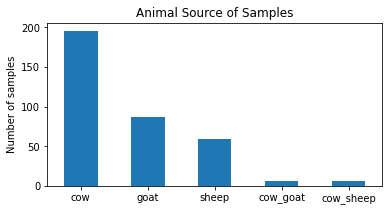

In [7]:
df_metadata['animal_source'].value_counts().plot(kind='bar', figsize = [6, 3], rot=0)
plt.ylabel('Number of samples')
plt.title('Animal Source of Samples')
plt.show()

**Observation:** Most cheese samples are made from cow milk. 

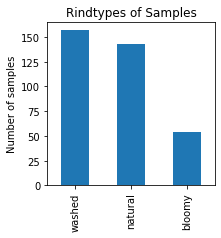

In [8]:
df_metadata['rindtype'].value_counts().plot(kind='bar', figsize = [3, 3])
plt.ylabel('Number of samples')
plt.title('Rindtypes of Samples')
plt.show()

**Observation:** Most cheese samples have a washed rindtype. 

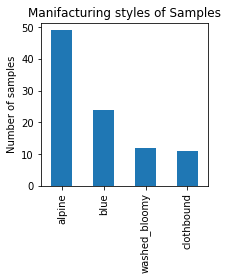

In [9]:
df_metadata['style'].value_counts().plot(kind='bar', figsize = [3, 3])
plt.ylabel('Number of samples')
plt.title('Manifacturing styles of Samples')
plt.show()

In [10]:
#count values for informational purpose (and for writing report)
df_metadata['style'].value_counts()

alpine           49
blue             24
washed_bloomy    12
clothbound       11
Name: style, dtype: int64

**Observation:** Most cheese samples are categorized as alpine manufacturing style. 
**NOTE:** Most of samples do not have a value in this column (258 samples). Only few have a notation about style. 

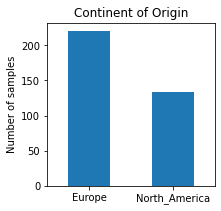

In [11]:
df_metadata['continent'].value_counts().plot(kind='bar', figsize = [3, 3], rot=0)
plt.ylabel('Number of samples')
plt.title('Continent of Origin')
plt.show()

In [12]:
df_metadata['continent'].value_counts()

Europe           221
North_America    133
Name: continent, dtype: int64

**Observation:** Most cheese samples are from Europe. 

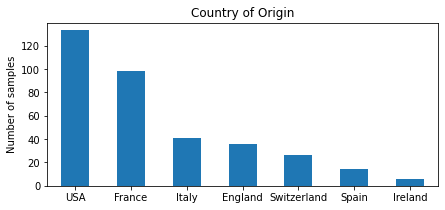

In [13]:
df_metadata['country'].value_counts().plot(kind='bar', figsize = [7, 3], rot=0)
plt.ylabel('Number of samples')
plt.title('Country of Origin')
plt.show()

In [14]:
df_metadata['country'].value_counts()

USA            133
France          98
Italy           41
England         36
Switzerland     26
Spain           14
Ireland          6
Name: country, dtype: int64

**Observation:** Most cheese samples are from the USA. 

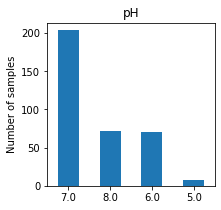

In [15]:
df_metadata['ph'] = pd.to_numeric(df_metadata['ph'], errors='coerce') #object to float for calculations
df_metadata['ph']=df_metadata['ph'].round() #round ph values to values without decimal to build groups
df_metadata['ph'].value_counts().plot(kind='bar', figsize = [3, 3], rot=0) # make plot
plt.ylabel('Number of samples')
plt.title('pH')
plt.show()


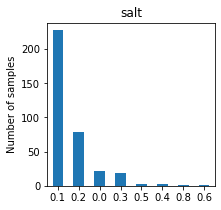

In [16]:
df_metadata['salt'] = pd.to_numeric(df_metadata['salt'], errors='coerce') #object to float for calculations
df_metadata['salt']=df_metadata['salt'].round(decimals = 1) #round salt values to build groups
df_metadata['salt'].value_counts().plot(kind='bar', figsize = [3, 3], rot=0) # make plot
plt.ylabel('Number of samples')
plt.title('salt')
plt.show()

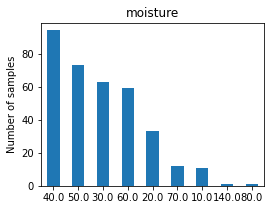

In [17]:
df_metadata['moisture'] = pd.to_numeric(df_metadata['moisture'], errors='coerce') #object to float for calculations
df_metadata['moisture']=df_metadata['moisture'].round(-1) #round moisture values to build groups
df_metadata['moisture'].value_counts().plot(kind='bar', figsize = [4, 3], rot=0) # make plot
plt.ylabel('Number of samples')
plt.title('moisture')
plt.show()

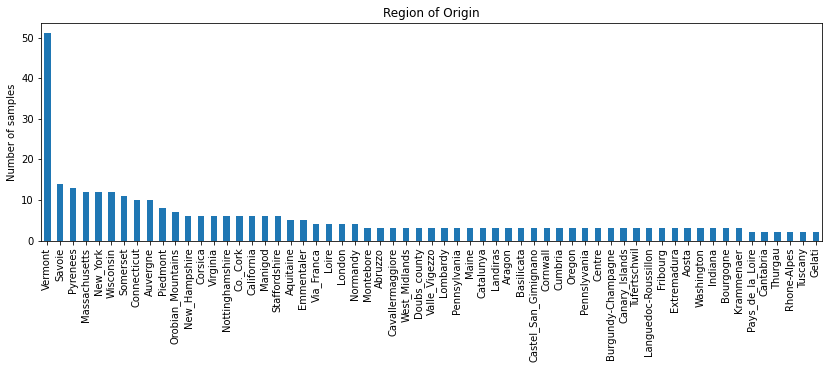

In [18]:
df_metadata['region'].value_counts().plot(kind='bar', figsize=(14, 4)) 
plt.ylabel('Number of samples')
plt.title('Region of Origin')
plt.show()

In [19]:
pd.set_option('display.max_rows', 62) #changes standard of showing maximum of rows to 62 rows

In [20]:
df_metadata['region'].value_counts()

Vermont                 51
Savoie                  14
Pyrenees                13
Massachusetts           12
New_York                12
Wisconsin               12
Somerset                11
Connecticut             10
Auvergne                10
Piedmont                 8
Orobian_Mountains        7
New_Hampshire            6
Corsica                  6
Virginia                 6
Nottinghamshire          6
Co._Cork                 6
California               6
Manigod                  6
Staffordshire            6
Aquitaine                5
Emmentaler               5
Via_Franca               4
Loire                    4
London                   4
Normandy                 4
Montebore                3
Abruzzo                  3
Cavallermaggiore         3
West_Midlands            3
Doubs_county             3
Valle_Vigezzo            3
Lombardy                 3
Pennsylvania             3
Maine                    3
Catalunya                3
Landiras                 3
Aragon                   3
B

In [21]:
#some qestions and aswers
print("What cheese types are most over-/underrepresented in your dataset?")
print("ANSWER: The biggest group builds the washed cheese followed by the natural cheese rindtype bloomy builds the last and less represented group")
print("Do you see a geographic skew?")
print("ANSWER: The cheeses are either from Europe or from North America. Within those two groups the sample collection from Europe is the largest. However, when it comes to the country of origin the USA is the most represented followed by France.")


What cheese types are most over-/underrepresented in your dataset?
ANSWER: The biggest group builds the washed cheese followed by the natural cheese rindtype bloomy builds the last and less represented group
Do you see a geographic skew?
ANSWER: The cheeses are either from Europe or from North America. Within those two groups the sample collection from Europe is the largest. However, when it comes to the country of origin the USA is the most represented followed by France.


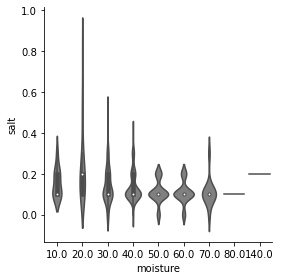

In [118]:
#from here some more plots to visualize different measurements
#here I tried to show the distribution of moisture vs salt concentration
sns.catplot(data=df_metadata, x="moisture", y="salt", kind="violin", size=4, color="grey", legend_out=True)

**Observation**: In this plot you can see that the distribution of moisture tends to be wider distributed (also in lower values) when the samples also include some measurements in higher salt concentrations. 

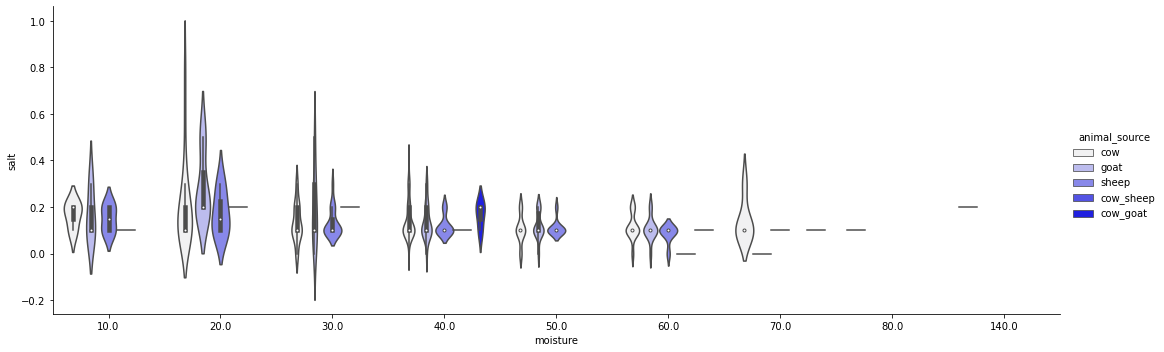

In [144]:
#from here some more plots to visualize different measurements
#here I tried to visualize a categorical values (animal source) in combination with numeric data (salt and moisture)
sns.catplot(data=df_metadata, x="moisture", y="salt", hue="animal_source", kind="violin", height=5, aspect=3, color="blue", legend_out=True)

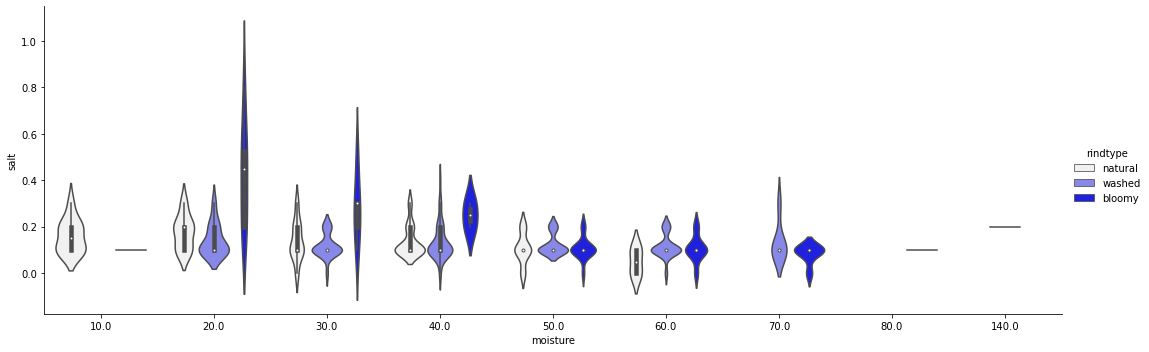

In [145]:
#here I tried to visualize a categorical values (rindtype) in combination with numeric data (salt and moisture)
sns.catplot(data=df_metadata, x="moisture", y="salt", hue="rindtype", kind="violin", height=5, aspect=3, color="blue", legend_out=True)

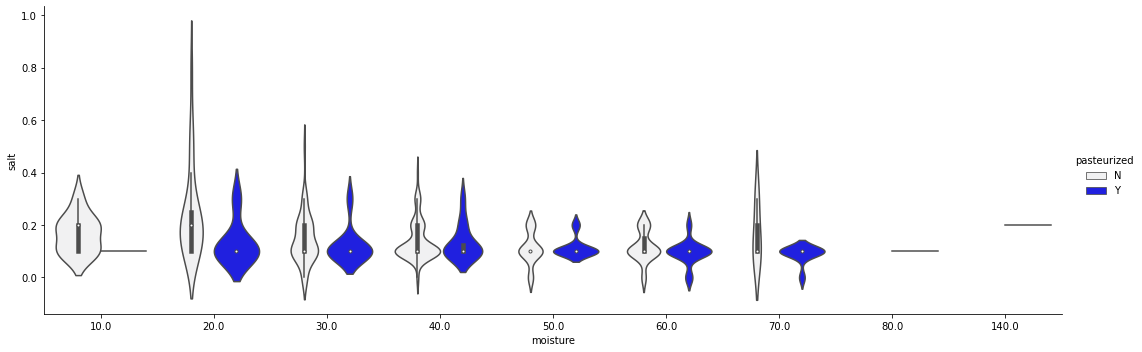

In [146]:
#here I tried to visualize a categorical values (pasteurization) in combination with numeric data (salt and moisture)
sns.catplot(data=df_metadata, x="moisture", y="salt", hue="pasteurized", kind="violin", height=5, aspect=3, color="blue", legend_out=True)

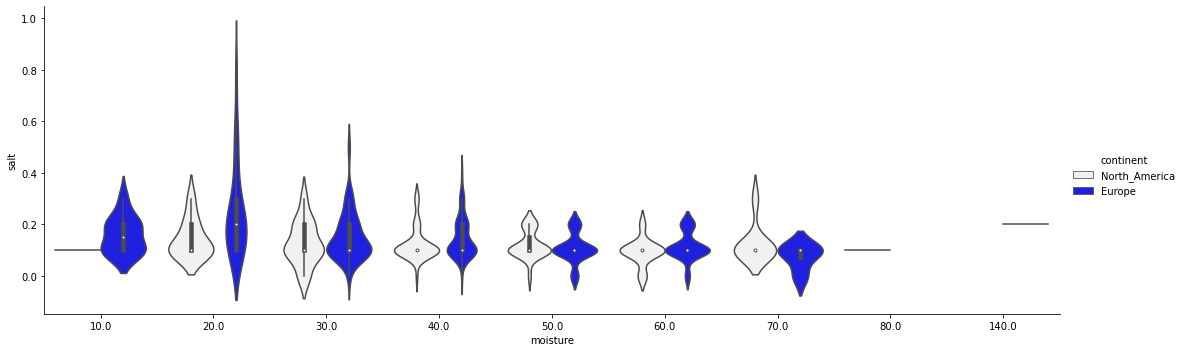

In [147]:
#here I tried to visualize a categorical values (continent) in combination with numeric data (salt and moisture)
sns.catplot(data=df_metadata, x="moisture", y="salt", hue="continent", kind="violin", height=5, aspect=3, color="blue", legend_out=True)

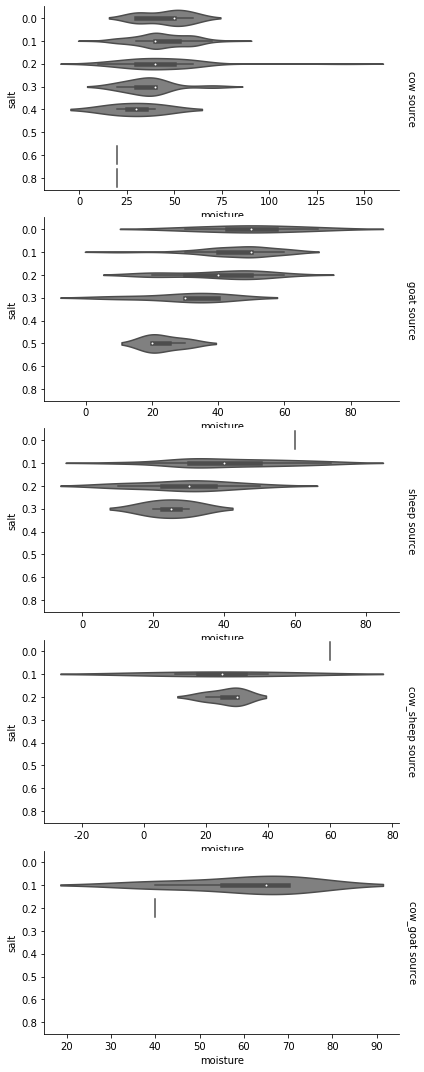

In [148]:
#maybe other visualization for same data
#the "row" command is categorical variable that will determine the faceting of the grid
#I don't like the visualization that much
animals = sns.catplot(
    data=df_metadata,
    x="moisture", y="salt", row="animal_source",
    kind="violin", orient="h",
    sharex=False, margin_titles=True,
    height=3, aspect=2,color="grey"
)
animals.set(xlabel="moisture", ylabel="salt")
animals.set_titles(row_template="{row_name} source")
for ax in animals.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f}')

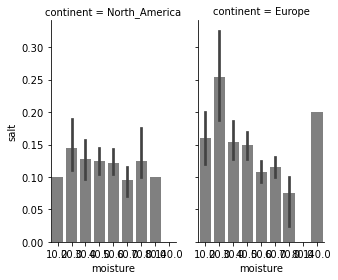

In [151]:
#still searching for perfect visualization :)
sns.catplot(
    data=df_metadata, x="moisture", y="salt", col="continent",color="grey"
    ,kind="bar", height=4, aspect=.6)

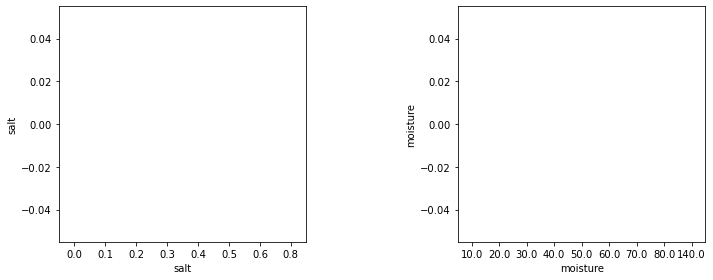

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(data=df_metadata, x='salt', y=(df_metadata['salt'].value_counts()), ax=axes[0])
sns.barplot(data=df_metadata, x='moisture', y=(df_metadata['moisture'].value_counts()), ax=axes[1])

# we can adjust spacing between individual subplots
fig.tight_layout(w_pad=10)